In [1]:
from sklearn.cluster import MeanShift
from sklearn.metrics import (adjusted_mutual_info_score, 
  adjusted_rand_score,
  silhouette_score)
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [3]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, 
                            cluster_std=0.4, random_state=0)

X = StandardScaler().fit_transform(X)

In [4]:
def visualize(X, labels):
    
    unique_labels = set(labels)
    N = len(unique_labels)
    cmap = plt.cm.rainbow
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('CMAP', cmaplist, cmap.N)
    
    
    plt.figure(figsize=(10, 10))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap)
    #borders = np.array([np.abs(X.min(axis=0)[0]), np.abs(X.max(axis=0)[0]), np.abs(X.min(axis=0)[1]), np.abs(X.max(axis=0)[1])])
    #plt.xlim(borders.ma - 2, X.max(axis=0)[0] + 2)
    
    
    
    plt.legend(*scatter.legend_elements(), fontsize=16)

In [5]:
X

array([[ 0.49426097,  1.45106697],
       [-1.42808099, -0.83706377],
       [ 0.33855918,  1.03875871],
       ...,
       [-0.05713876, -0.90926105],
       [-1.16939407,  0.03959692],
       [ 0.26322951, -0.92649949]])

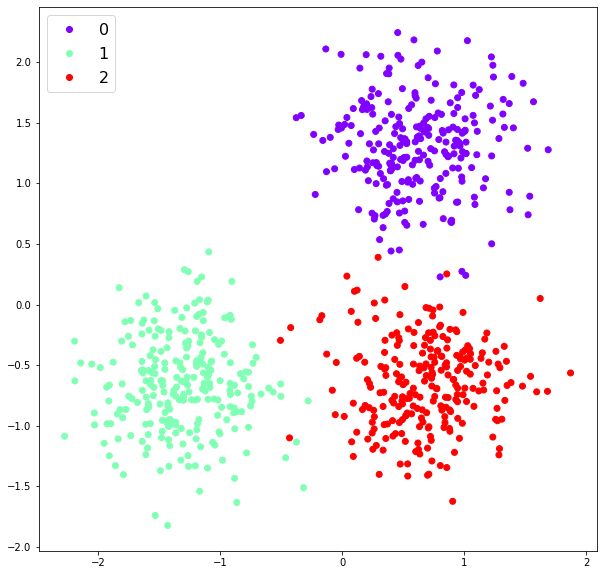

In [6]:
visualize(X, labels_true)

In [7]:
model = MeanShift()

# Manually generated dataset from make_blobs

In [8]:
model.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [9]:
res2 = model.labels_

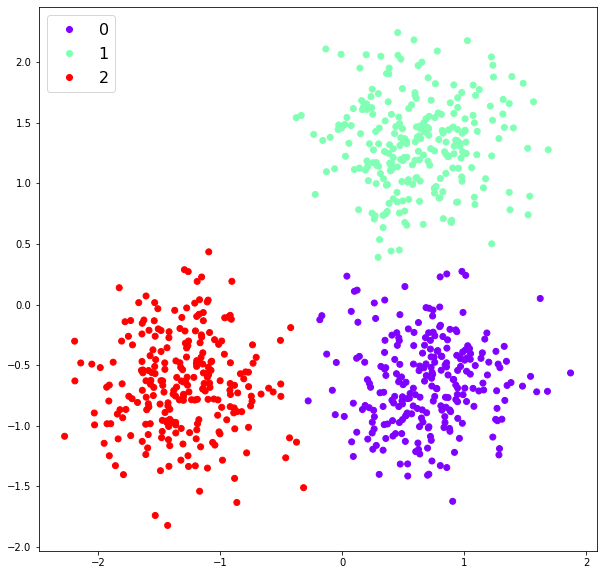

In [10]:
visualize(X, res2)

In [11]:
adjusted_rand_score(labels_true, res2)

0.9682515649309645

In [12]:
adjusted_mutual_info_score(labels_true, res2)

0.9445999199156632

In [13]:
silhouette_score(X, res2)

0.6496075455022047

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa76ebd1290>


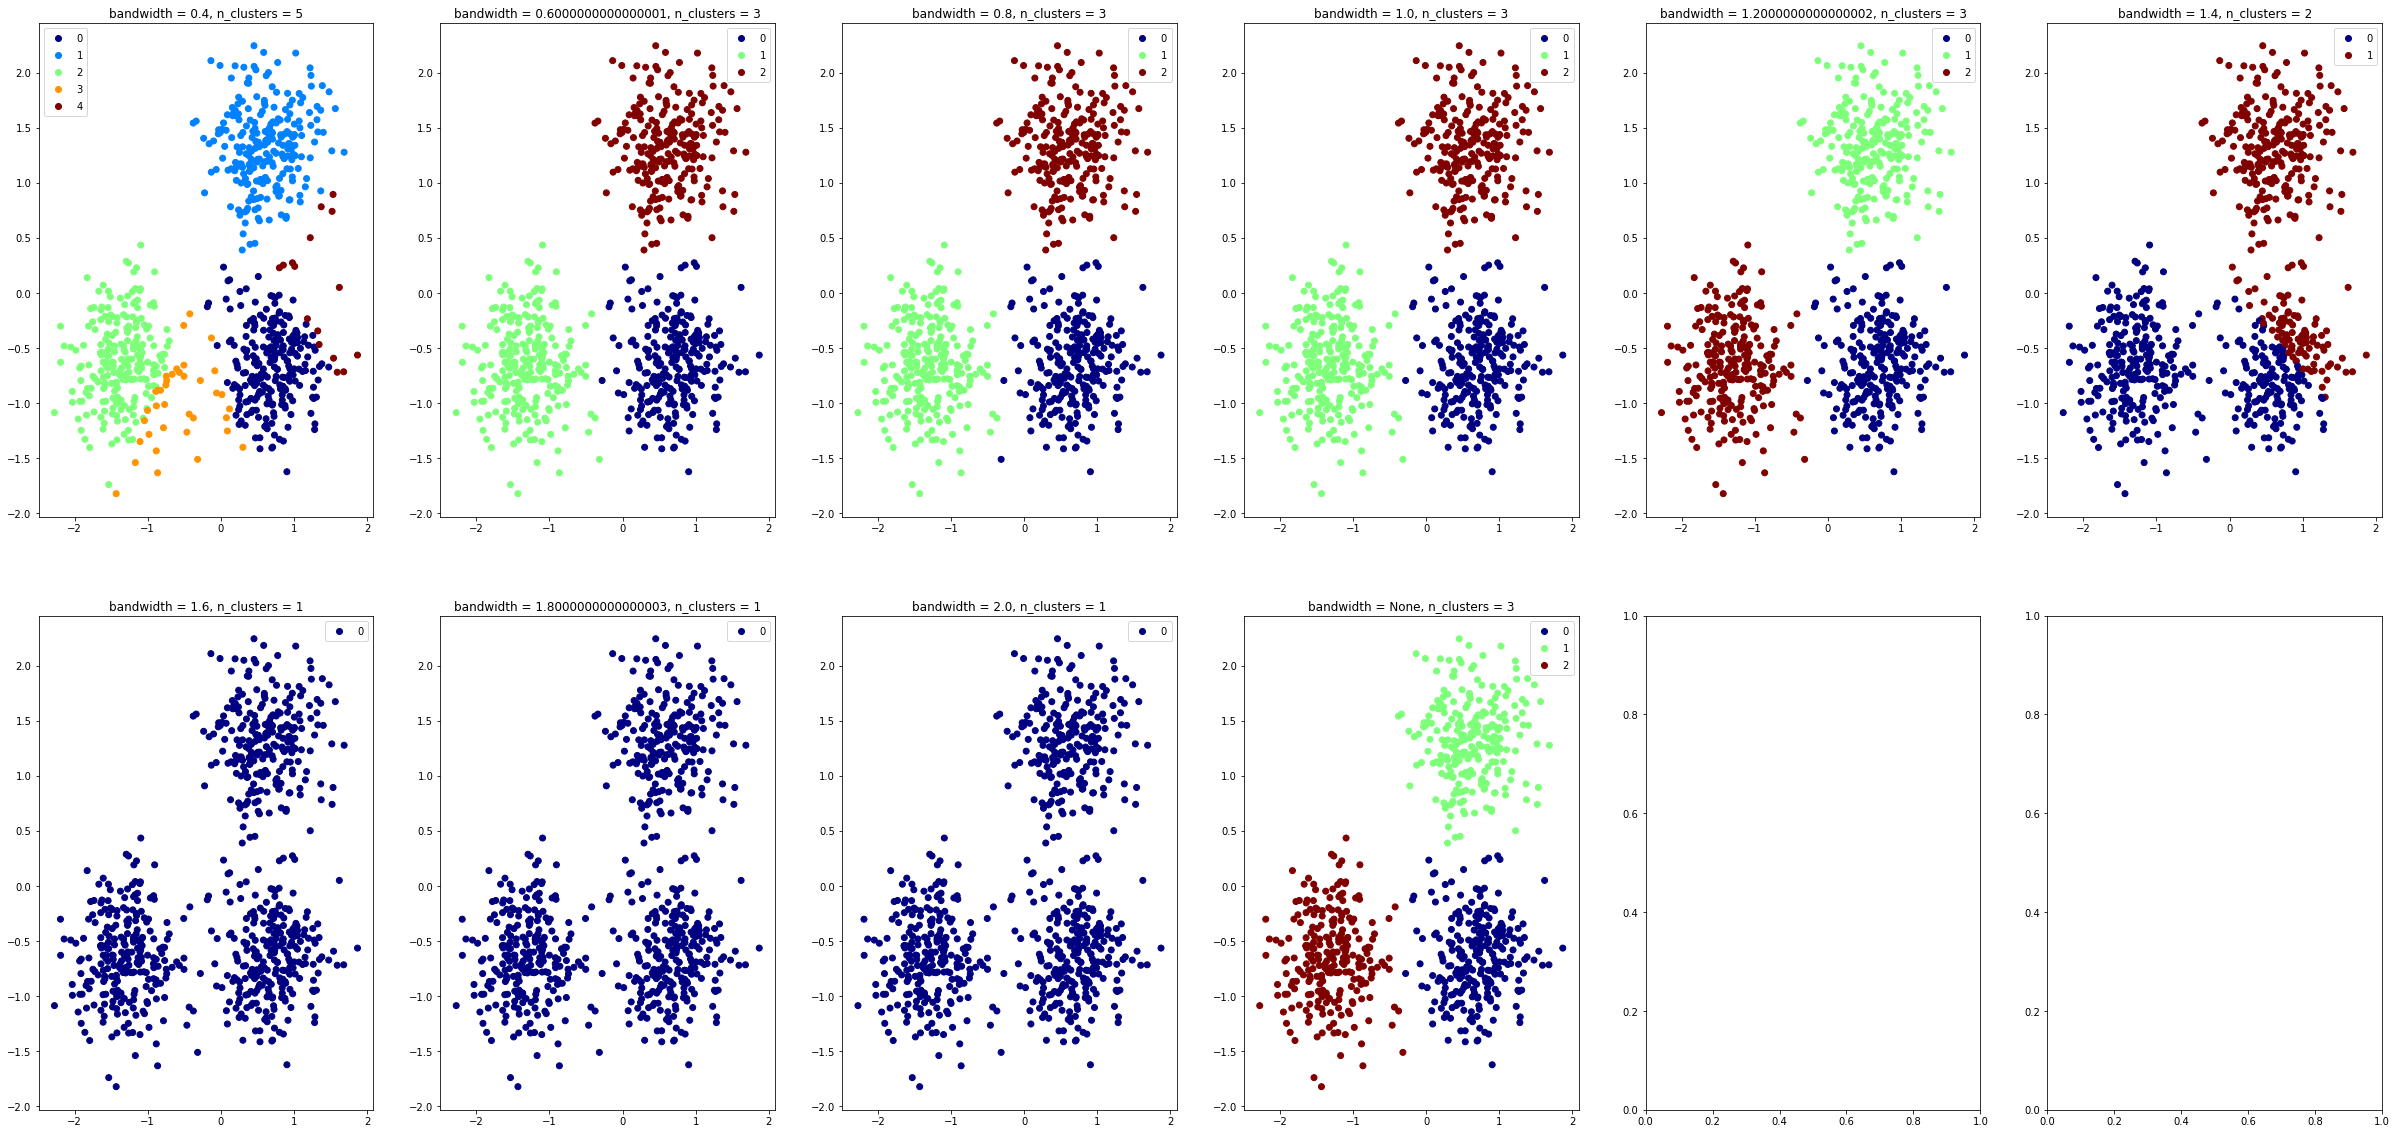

In [14]:
import numpy as np
from scipy.spatial.distance import cdist


fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(42, 20))
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap_ = cmap.from_list('CMAP', cmaplist, cmap.N)

print(axes)


b_values = list(np.linspace(0.4, 2, 9)) + [None]
n_clusters = []
distortions = []

axes = axes.flatten()

for i, b in enumerate(b_values):
  labels = MeanShift(bandwidth=b).fit_predict(X)
  n = len(np.unique(labels))
  unique_labels = np.unique(labels)
  n_clusters.append(n)
  # get cluster centroids
  centroids = np.array([X[labels == label].mean(axis=0) for label in unique_labels])
  #calculate distortions
  distortions.append(sum(np.min(cdist(X, centroids, 'euclidean'), axis=1))/X[labels > -1].shape[0])
  scatter = axes[i].scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap_)
  axes[i].legend(*scatter.legend_elements())
  axes[i].set_title(f'bandwidth = {b}, n_clusters = {n}')
plt.show()



[0.44532419 0.47242883 0.47246559 0.47242883 0.47242883 0.8963158
 1.34856323 1.34856323 1.34856323 0.47242883]
[5 3 3 3 3 2 1 1 1 3]


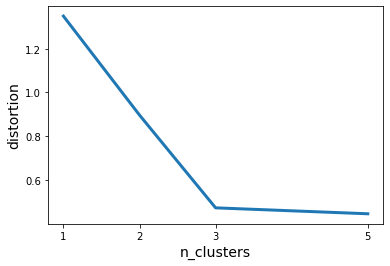

In [15]:
distortions = np.array(distortions)
print(distortions)
n_clusters = np.array(n_clusters)
print(n_clusters)
averaged_distortions = [distortions[n_clusters == n].mean() for n in np.unique(n_clusters)]

plt.plot(np.unique(n_clusters), averaged_distortions, linewidth=3)
plt.xticks(np.unique(n_clusters))
plt.xlabel('n_clusters', fontsize=14)
plt.ylabel('distortion', fontsize=14)
plt.show()

# Stability check

In [16]:
X_stab = X[np.random.choice(X.shape[0], size=100, replace=False),:]

In [17]:
model.fit(X_stab)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [18]:
res2_stab = model.labels_

In [19]:
visualize(X_stab, res2_stab)

# Increase number of iterations

In [20]:
model1 = MeanShift(max_iter=1000)

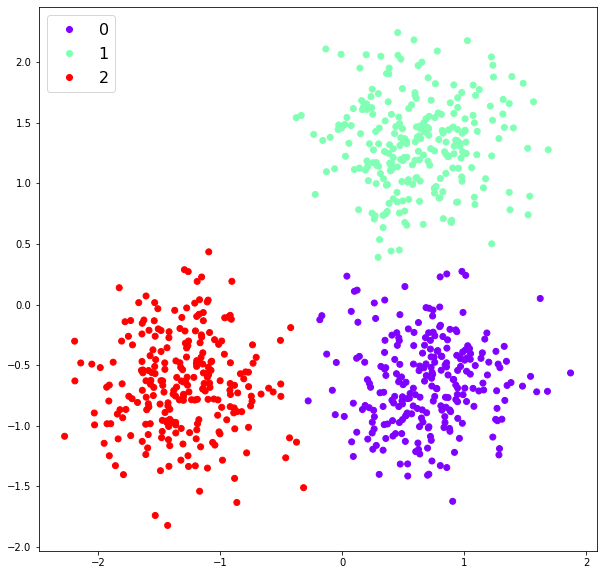

In [21]:
model1.fit(X)
res2_iter = model1.labels_
visualize(X, res2_iter)

# Dataset make_moons

In [22]:
X1, y1 = make_moons()

In [23]:
visualize(X1, y1)

In [24]:
model.fit(X1)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [25]:
res1 = model.labels_

In [26]:
visualize(X1, res1)

In [27]:
adjusted_rand_score(y1, res1)

0.37824271880317806

In [28]:
adjusted_mutual_info_score(y1, res1)

0.3048300852934663

In [29]:
silhouette_score(X1, res1)

0.4704960134493479